In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
iris_dataset = load_iris()
x = iris_dataset.data.T[0]
y = iris_dataset.data.T[2]

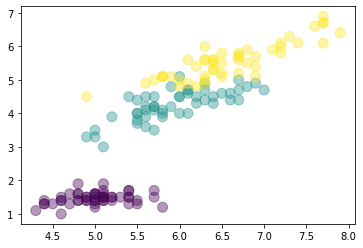

In [3]:
plt.scatter(x,y, alpha=0.4,s=100, c=iris_dataset.target)

Рассмотрим для начала обычный бинарный классификатор

In [4]:
features_binary = iris_dataset.data[:100]
target_binary = iris_dataset.target[:100]

x_train, x_test, y_train, y_test = train_test_split(features_binary, target_binary, random_state=0)

lr_bin = LogisticRegression(solver='lbfgs', random_state=0).fit(x_train, y_train)
lr_bin_pred = lr_bin.predict(x_test)

print('Accuracy %.4f' % accuracy_score(y_test, lr_bin_pred))

Accuracy 1.0000


Проверим как наша модель будет рабоатать с рандомом данных 

In [5]:
new_data = [[1.5,  2.5,  3.5,  4.5]]
lr_bin.predict(new_data)

array([1])

Теперь посмотрим вероятность с которой она рандомное значение оттнесла к  этому классу

In [6]:
lr_bin.predict_proba(new_data)

array([[0.01547014, 0.98452986]])

Рассмотрим мультиклассовый классификатор

In [7]:
features_all = iris_dataset.data
target_all = iris_dataset.target

x_train, x_test, y_train, y_test = train_test_split(features_all, target_all, random_state=0)

lr_mul = LogisticRegression(random_state=0).fit(x_train, y_train)
lr_mul_pred = lr_mul.predict(x_test)

print('Accuracy %.4f' % accuracy_score(y_test, lr_mul_pred))

Accuracy 0.9737


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
lr_mul.predict_proba(new_data)

array([[0.00276547, 0.00200913, 0.9952254 ]])

Теперь мы можем говорить о степени уверенности

Посмотрим матрицу ошибок

In [9]:
conf_mtrx = confusion_matrix(y_test, lr_mul_pred)
conf_mtrx

#диагональ - верно классифицированные. - вне диагонали спутанные с диагональю значения

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

мы неправильно классифицировали лишь 1 объект

In [10]:
#multi_class='ovr' - мультиклассовая классификация по умолчанию. Иногда можно менять на первого вида - один против всех 'mnl'
lr_mul

LogisticRegression(random_state=0)